# Market Mix Modeling using Sales data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os

In [3]:
#Market Mix Modeling
#Sales Data 
#To understand how much each marketing input contributes to sales, and how much to spend on each marketing input.

#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../data/Advertising.csv", index_col=0)
df.head()

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [4]:
#remove extra 'Unnamed' column
df_clean = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df_clean.head()

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [5]:
#Data Description 

df_clean.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

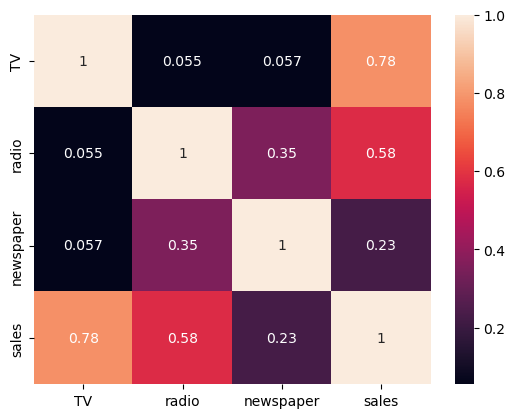

In [7]:
#Correlation b/w variables
corr = df_clean.corr()
sns.heatmap(corr, annot = True)

In [8]:
#Labels and features
labels = df_clean['sales']
features = df_clean.drop(['sales'], axis=1)

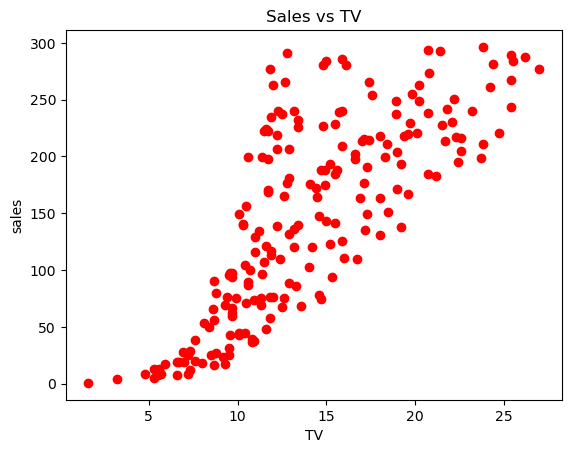

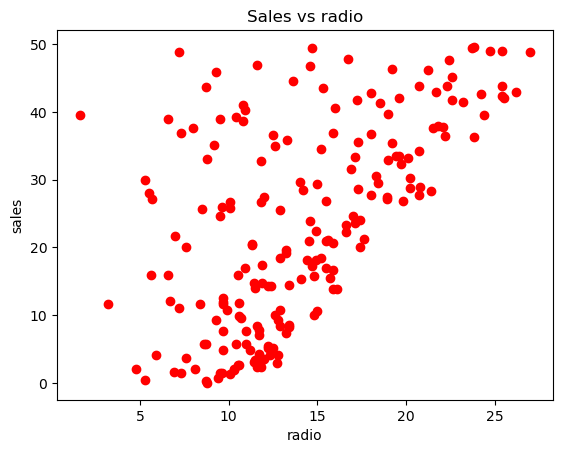

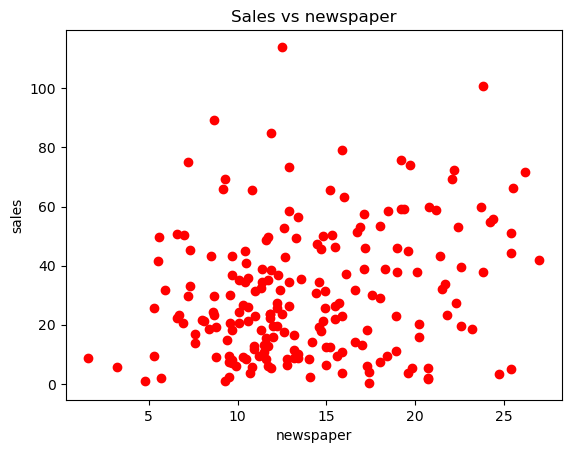

In [9]:
# Scatter graph b/w response and features
for x in features:
    plt.plot(labels, features[x], 'ro')  # arguments are passed to np.histogram
    plt.title("Sales vs " + x)
    plt.xlabel(x)
    plt.ylabel("sales")
    plt.show()

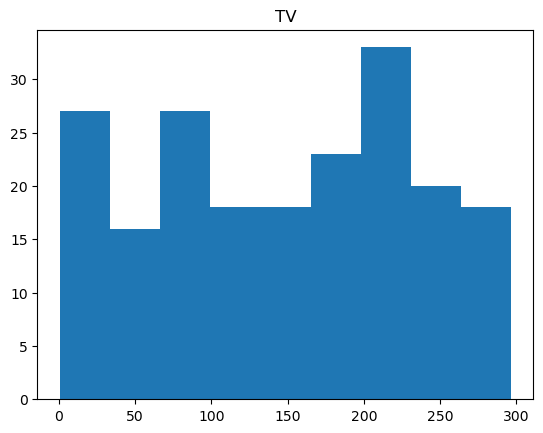

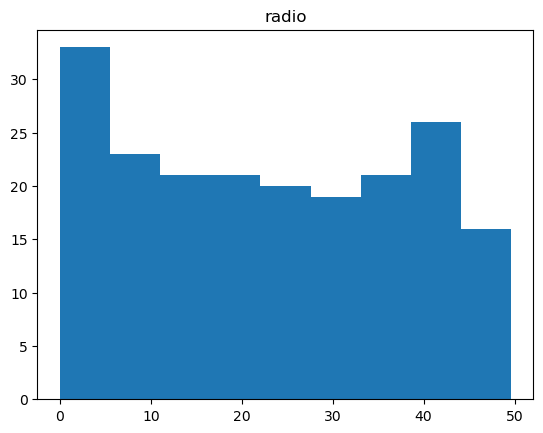

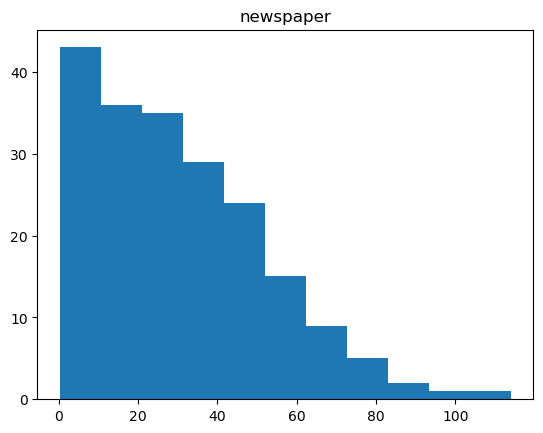

In [10]:
#Data Distribultion 
for x in features:
    plt.hist(features[x], bins='auto')  # arguments are passed to np.histogram
    plt.title(x)
    plt.show()

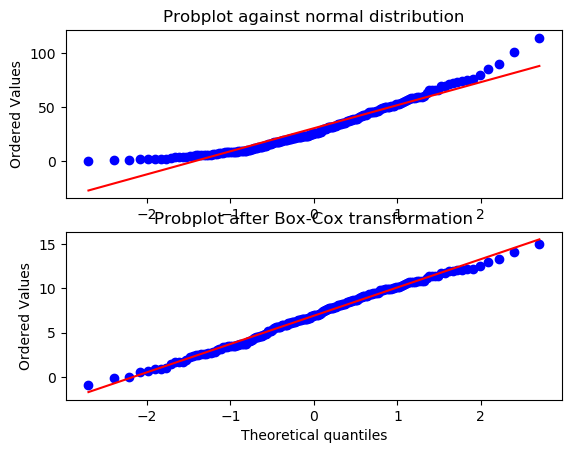

In [11]:
#As from the above histogram graph, the data distribution for the newspaper is skrew towards left.
#Lets correct it using Box Cox which helps in removing the data skrewness.

from scipy import stats
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(211)
x = df_clean['newspaper']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
#We now use boxcox to transform the data so itâ€™s closest to normal:
ax2 = fig.add_subplot(212)
df_clean['newspaper'], _ = stats.boxcox(x)
prob = stats.probplot(df_clean['newspaper'], dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()

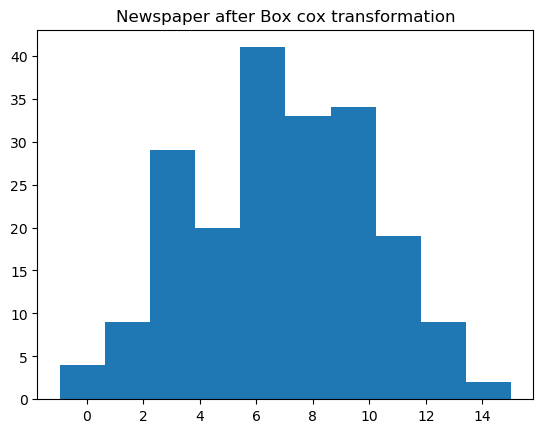

In [12]:
plt.hist(df_clean['newspaper'], bins='auto')  # arguments are passed to np.histogram
plt.title("Newspaper after Box cox transformation")
plt.show()

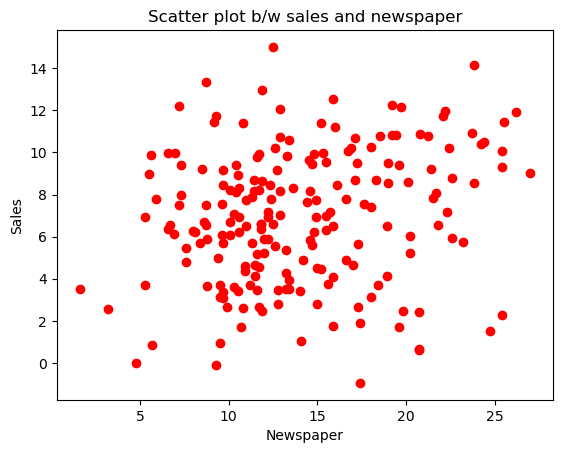

In [13]:
plt.plot(df_clean['sales'], df_clean['newspaper'], 'ro')  # arguments are passed to np.histogram
plt.title("Scatter plot b/w sales and newspaper")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

In [14]:
# As from the above graph it is clear that newspaper do not have any relationship with the Sales.
# Lets build 2 algorithm with and without newspaper to get more clear picture.

In [15]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula="sales~TV+radio+newspaper", data=df_clean).fit()
model2 = sm.ols(formula="sales~TV+radio", data=df_clean).fit()
model3 = sm.ols(formula="sales~TV", data=df_clean).fit()
#sales~TV+radio+newspaper
print(model1.summary())
print(model2.summary())
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.2
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           1.58e-96
Time:                        20:34:52   Log-Likelihood:                -386.19
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8894      0.361      7.995      0.0

In [16]:
#AIC BIC
#They are used to compare a number of models and the model with lowest values of AIC and BIC is 
#considered to be the best (however AIC and BIC are accompanied often by other tests of fit, 
#e.g. RMSEA, CFI, TLI etc. and the decision which model is the best is not based on AIC and BIC only

#Model 1
#model1 = sm.ols(formula="sales~TV+radio+newspaper", data=df_clean).fit()

#R-squared:                       0.897
#Adj. R-squared:                  0.896
#F-statistic:                     570.3
#Prob (F-statistic):           1.58e-96
#Log-Likelihood:                -386.18
#AIC:                             780.4
#BIC:                             793.6

#Model2
#model2 = sm.ols(formula="sales~TV+radio", data=df_clean).fit()
#R-squared:                       0.897
#Adj. R-squared:                  0.896
#F-statistic:                     859.6
#Prob (F-statistic):           4.83e-98
#Log-Likelihood:                -386.20
#AIC:                             778.4
#BIC:                             788.3
    
#Model3
#model3 = sm.ols(formula="sales~TV", data=df_clean).fit()
#R-squared:                       0.612
#Adj. R-squared:                  0.610
#F-statistic:                     312.1
#Prob (F-statistic):           1.47e-42
#Log-Likelihood:                -519.05
#AIC:                             1042.
#BIC:                             1049.

#From the above results it is clear that the 'model 2' with feature 'radio' and 'TV' is having the lowest
#AIC & BIC

#Model 2 Parameters, error, and r square
print('Parameters: ', model2.params)
print('R2: ', model2.rsquared)
print('Standard errors: ', model2.bse)

Parameters:  Intercept    2.921100
TV           0.045755
radio        0.187994
dtype: float64
R2:  0.8971942610828956
Standard errors:  Intercept    0.29449
TV           0.00139
radio        0.00804
dtype: float64


In [17]:
#Actual and predicted values
y_pred = model2.predict()
df1 = pd.DataFrame({'Actual': labels, 'Predicted': y_pred})  
df1.head(10)

Actual  Predicted
1     22.1  20.555465
2     10.4  12.345362
3      9.3  12.337018
4     18.5  17.617116
5     12.9  13.223908
6      7.2  12.512084
7     11.8  11.718212
8     13.2  12.105516
9      4.8   3.709379
10    10.6  12.551697

In [18]:
#Final observation

#Values from Model 1 -> sales~TV+radio+newspaper

#==============================================================================
#                 coef    std err          t      P>|t|      [0.025      0.975]
#------------------------------------------------------------------------------
#Intercept      2.8894      0.361      7.995      0.000       2.177       3.602
#TV             0.0457      0.001     32.810      0.000       0.043       0.048
#radio          0.1876      0.008     22.190      0.000       0.171       0.204
#newspaper      0.0060      0.040      0.152      0.879      -0.072       0.084
#==============================================================================

#newspaper Values
#Coef   : 0.0060
#t-test : 0.152
#p-value: 0.860

#From the above values it is clear that newspaper maketing is not affecting sales by any chance.
#High Pvalue(>0.005) is always fail to reject null hypothesis.
#That means there is no relationship between the newspaper marketing and sales.

#=========================================Thank you ====================================================
#==================================Do comment your thoughts=============================================
